Accuracy: 0.9742803209060877


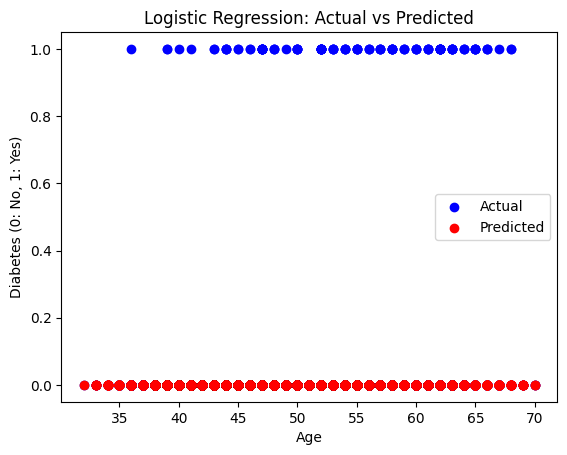

Model Coefficient (Weights): [[ 0.37367508  0.05801823 -0.13975864 -0.22388894 -0.00757897  0.483794
  -0.16079445  0.51860698]]
Model Intercept: [-6.65696564]


In [1]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and reading files
import matplotlib.pyplot as plt  # For creating plots
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.metrics import accuracy_score  # To evaluate model performance
from sklearn.impute import SimpleImputer # For handling missing values

# Load the CSV file containing the dataset into a DataFrame
file = pd.read_csv('/content/framingham.csv')

# Display the first few rows of the dataset to inspect its structure
file.head()

# Define 'X' as the feature columns we will use for prediction (all columns except 'diabetes')
x = file[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp']]

# Define 'y' as the target column (whether the person has diabetes or not)
y = file['diabetes']

# Create an instance of the SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the feature data and transform it
x = imputer.fit_transform(x)

# Create an instance of the Logistic Regression model
model = LogisticRegression()

# Fit the Logistic Regression model to the training data
model.fit(x, y)

# Predict the target variable for the test set
y_pred = model.predict(x) # Use the imputed data for predictions

# Print the accuracy score of the model
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# Create a scatter plot of actual vs predicted values (for two selected features)
plt.scatter(x[:, 1], y, color='blue', label='Actual') # Use the imputed data for plotting
plt.scatter(x[:, 1], y_pred, color='red', label='Predicted') # Use the imputed data and predictions for plotting
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Age')
plt.ylabel('Diabetes (0: No, 1: Yes)')
plt.legend()
plt.show()

# Display model coefficients (weights) and intercept
print(f"Model Coefficient (Weights): {model.coef_}")
print(f"Model Intercept: {model.intercept_}")